# Demo of Stable Diffusion

## Imports


In [1]:
import sys
from PIL import Image
import torch 
from transformers import CLIPTokenizer
sys.path.append('../')

In [2]:
import src.model_loader as model_loader
import src.pipeline as pipeline

## Hyperparameters

In [3]:

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")



Using device: cpu


# Test 

### Text-to-image

Models loaded


100%|██████████| 50/50 [06:29<00:00,  7.79s/it]


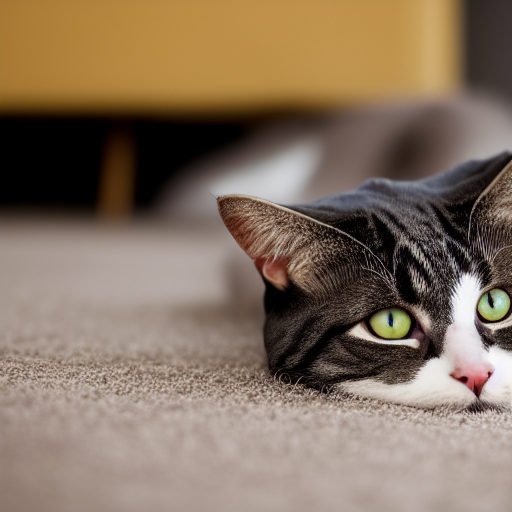

In [4]:
tokenizer = CLIPTokenizer("../models/tokenizer/vocab.json", merges_file="../models/tokenizer/merges.txt")
model_file = "../models/stable_diffusion/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)


print ("Models loaded")

## TEXT TO IMAGE

prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14




## SAMPLER

sampler = "ddpm"
num_inference_steps = 50

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=None,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

### Image-to-image

100%|██████████| 45/45 [06:31<00:00,  8.69s/it]


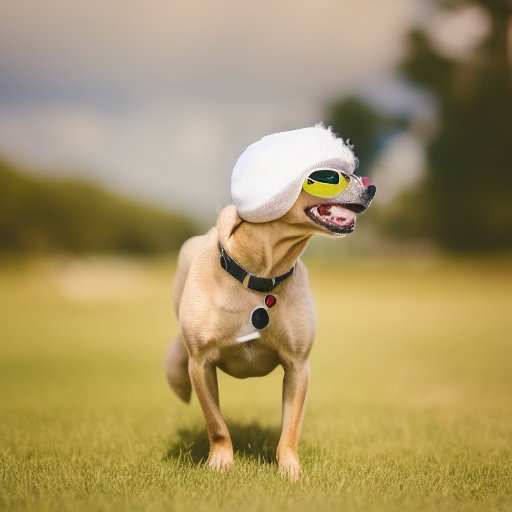

In [5]:
## IMAGE TO IMAGE

prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."

input_image = None
# Comment to disable image to image
image_path = "../data/raw/chien.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9


## SAMPLER

sampler = "ddpm"
num_inference_steps = 50


output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)


100%|██████████| 25/25 [03:56<00:00,  9.46s/it]


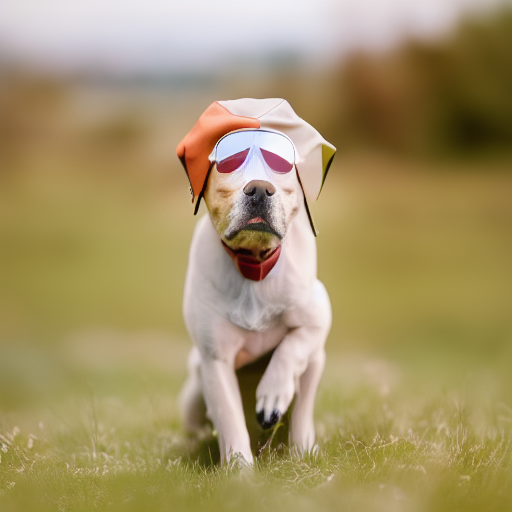

In [6]:
prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."

input_image = None
# Comment to disable image to image
image_path = "../data/raw/chien.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.5


## SAMPLER

sampler = "ddpm"
num_inference_steps = 50


output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

100%|██████████| 100/100 [15:05<00:00,  9.05s/it]


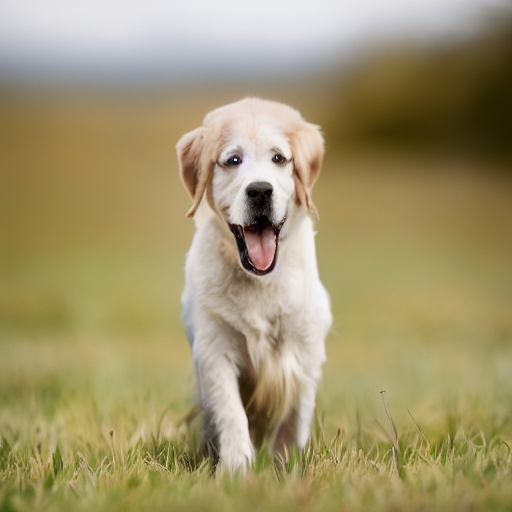

In [13]:
prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."

input_image = None
# Comment to disable image to image
image_path = "../data/raw/chien.jpg"
input_image = Image.open(image_path)
input_image.show()
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.2


## SAMPLER

sampler = "ddpm"
num_inference_steps = 500


output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)